## Doing a bit of Data Analysis 😎

This won't stay in the project but it's easier to do this in a notebook while developing

In [131]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams

In [50]:
CSV_FILE = "data/full/cineasta_full.csv"

In [51]:
cineData = pd.read_csv(CSV_FILE, parse_dates=['Date'])
cineData['MovieAge'] = pd.to_timedelta(cineData['MovieAge'])
cineData = cineData.drop(columns=["Unnamed: 0"])

In [52]:
cineData.dtypes

OG_Title                 object
TMDB_Title               object
Release_Date             object
Rating                  float64
Genre_IDs                object
MovieAge        timedelta64[ns]
Semester                 object
Weekday                  object
Date             datetime64[ns]
Attendance                int64
dtype: object

In [53]:
cineData.head()

,OG_Title,TMDB_Title,Release_Date,Rating,Genre_IDs,MovieAge,Semester,Weekday,Date,Attendance
0,Kingsman 2,Kingsman: The Golden Circle,2017-09-20,6.969,"['Action', 'Adventure', 'Comedy']",202 days,Sommersemester 18,Tuesday,2018-04-10,87
1,Ferris Bueller's Day off,Ferris Bueller's Day Off,1986-06-11,7.605,['Comedy'],11627 days,Sommersemester 18,Wednesday,2018-04-11,16
2,Detroit,Detroit,2017-07-28,7.300,"['Crime', 'Drama', 'Thriller', 'History']",264 days,Sommersemester 18,Wednesday,2018-04-18,9
3,It,It,2017-09-06,7.243,"['Horror', 'Fantasy']",230 days,Sommersemester 18,Tuesday,2018-04-24,102
4,The Square,The Square,2017-08-25,6.765,['Drama'],243 days,Sommersemester 18,Wednesday,2018-04-25,30


In [54]:
cineData['year'] = cineData['Semester'].str.split(" ").str[1]

In [55]:
#after covid
a_cov = cineData[cineData['Date'] > pd.to_datetime('2020-3-1')]
#before covid
b_cov = cineData[cineData['Date'] < pd.to_datetime('2020-3-1')]

In [56]:
print(f"Median before Covid: {b_cov['Attendance'].median()}")
print(f"Median after Covid: {a_cov['Attendance'].median()}")

Median before Covid: 33.0
Median after Covid: 9.0


In [57]:
semDiff_a = a_cov.groupby(['year']).Attendance.median().sort_index()
semDiff_b = b_cov.groupby(['year']).Attendance.median().sort_index()

In [180]:
#add currPos incase you want to append another barplot
def add_bar_label(ax, index, currPos):
    for i, ind in enumerate(index):
        ax.annotate(str(ind), (currPos+i - 0.2, 2), rotation = 'vertical', 
                    fontsize = 7, color = "w", style = "oblique")
    return i

Text(0.5, 1.0, 'Median of Attendance')

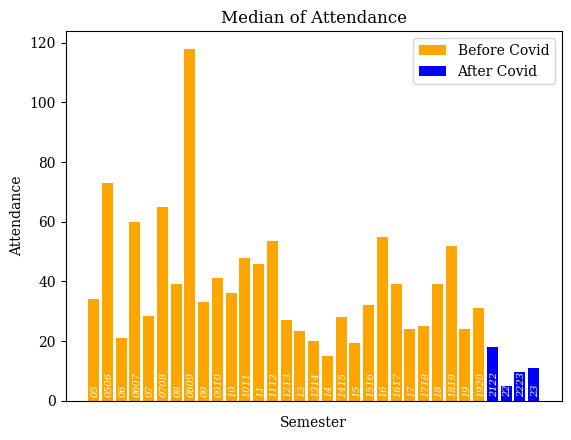

In [181]:
rcParams['font.family'] = ['serif']
ax = plt.gca()

plt.bar(semDiff_b.index, semDiff_b.values, color = 'orange')
currPos = add_bar_label(ax, semDiff_b.index, 0)

plt.bar(semDiff_a.index, semDiff_a.values, color = 'blue')
add_bar_label(ax, semDiff_a.index, 29)

ax.axes.xaxis.set_ticklabels([])
plt.tick_params(bottom = False)

plt.xlabel('Semester')
plt.ylabel('Attendance')
plt.legend(['Before Covid', 'After Covid'])
plt.title("Median of Attendance")

In [81]:
rates_a = a_cov.groupby(['Rating'])['Attendance'].mean()
rates_b = b_cov.groupby(['Rating'])['Attendance'].mean()

Text(0.5, 1.0, 'Rating to Attendance')

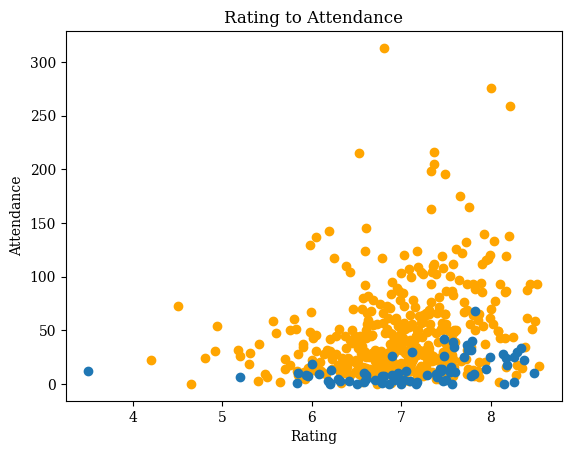

In [182]:
#After Covid Rating to Attendance
plt.scatter(rates_b.index, rates_b.values, color='orange')
plt.scatter(rates_a.index, rates_a.values)
plt.xlabel('Rating')
plt.ylabel('Attendance')
plt.title("Rating to Attendance")

Text(0.5, 1.0, 'Movie Age to Attendance')

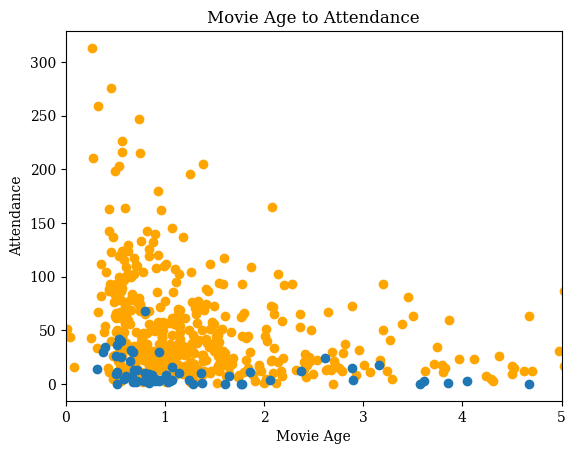

In [185]:
#Movie Age to Attendance
plt.scatter(b_cov['MovieAge'] / pd.to_timedelta('365 days'), b_cov['Attendance'], color = 'orange')
plt.scatter(a_cov['MovieAge'] / pd.to_timedelta('365 days'), a_cov['Attendance'])
plt.xlabel('Movie Age')
plt.xlim([0, 5])
plt.ylabel('Attendance')
plt.title("Movie Age to Attendance")

In [227]:
semType_a = a_cov.groupby(cineData['Semester'].str.split(" ").str[0])['Attendance'].mean()
semType_b = b_cov.groupby(cineData['Semester'].str.split(" ").str[0])['Attendance'].mean()

Text(0.5, 1.0, 'Mean of each Semestertype')

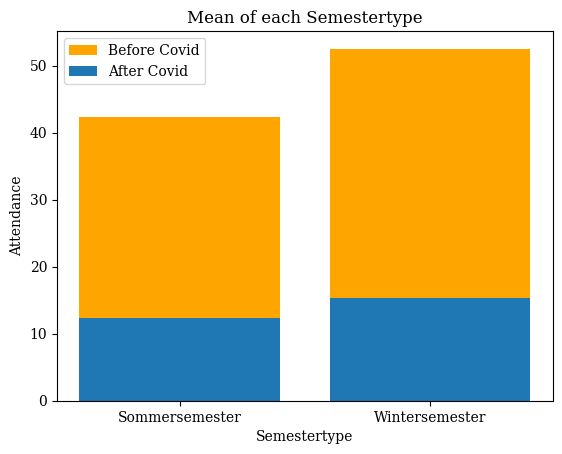

In [231]:
plt.bar(semType_b.index, semType_b.values, color = "orange")
plt.bar(semType_a.index, semType_a.values)

plt.legend(['Before Covid', 'After Covid'])

plt.xlabel('Semestertype')
plt.ylabel('Attendance')
plt.title("Mean of each Semestertype")

In [327]:
def week_prepare(df: pd.DataFrame) -> pd.Series:
    aha = df
    df = df.groupby(['Weekday'])['Attendance'].mean()
    df = df[aha.groupby(['Weekday'])['Attendance'].count() > 10]
    df = df.reindex(['Tuesday', 'Wednesday', "Thursday"])
    df = df.drop(columns=['count'])
    
    return df

In [334]:
week_a = week_prepare(a_cov)
week_b = week_prepare(b_cov)

Text(0.5, 1.0, 'Mean average of Weekdays')

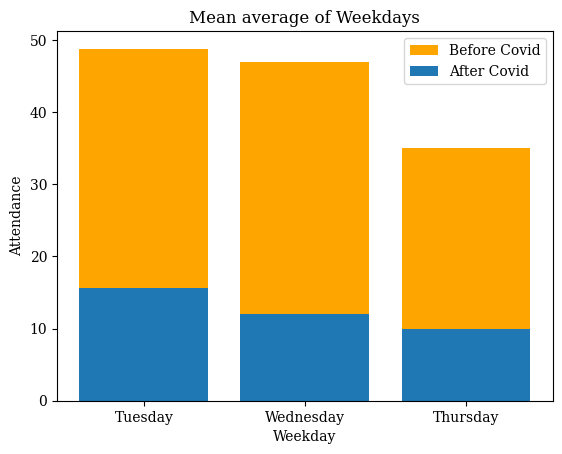

In [336]:
plt.bar(week_b.index, week_b.values, color="orange")
plt.bar(week_a.index, week_a.values)

plt.legend(['Before Covid', 'After Covid'])

plt.xlabel('Weekday')
plt.ylabel('Attendance')
plt.title("Mean average on a Weekday")

#### Checking for some correlations

Age to Attendance

In [76]:
cineData['MovieAge'].corr(cineData['Attendance'], method='pearson')

-0.09619966738507103

Rating to Attendance

In [186]:
cineData['Rating'].corr(cineData['Attendance'], method='pearson')

0.22194332545210935

Weekday to Attendance

In [232]:
weekday = cineData.groupby(['Weekday'])['Attendance'].mean()
weekInd, weekVal = weekday.index, weekday.values

#Corr between Mean and Weekday (??) really not sure
pd.Series(pd.Categorical(weekInd).codes).corr(pd.Series(weekVal))

-0.5703199952171336

In [233]:
# This should be the real correlation between the Attendance and the Weekday
pd.Series(pd.Categorical(cineData['Weekday']).codes).corr(cineData['Attendance'], method='pearson')

0.005672306162125917

Semestertype to Attendance

In [234]:
sem_dummy = pd.Series(pd.Categorical(cineData['Semester'].str.split(" ").str[0]).codes)
sem_dummy.corr(cineData['Attendance'], method='pearson')

0.1348272858378278